In [22]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv(r'/content/Churn_Modelling.csv', encoding='latin1')

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [28]:
print("shape:",df.shape)

shape: (10000, 14)


In [29]:
df['Exited'].value_counts(normalize=True)* 100

,proportion
Exited,
0,79.63
1,20.37


In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(
X, y, test_size=0.20, random_state=42)

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm=SMOTE(random_state=42)

Categorical columns: ['Surname', 'Geography', 'Gender']

Logistic Regression Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1607
           1       0.34      0.33      0.33       393

    accuracy                           0.74      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.74      0.74      0.74      2000


Decision Tree Report
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1607
           1       0.55      0.52      0.54       393

    accuracy                           0.82      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.82      0.82      0.82      2000


Random Forest Report
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.76      0.38      0.50       393

    accuracy                           0.85      20

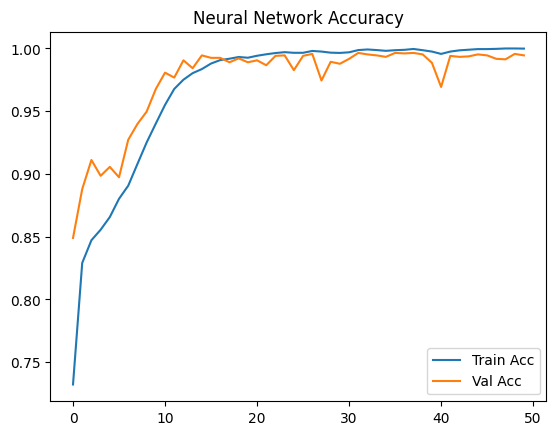

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression    0.7415   0.338542  0.330789  0.334620
1        Decision Tree    0.8235   0.553763  0.524173  0.538562
2        Random Forest    0.8540   0.758974  0.376590  0.503401
3           Neural Net    0.7595   0.381081  0.358779  0.369594


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE
cat_cols = xtrain.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# Encoder - choose param based on sklearn version
import sklearn
skl_version = sklearn.__version__
if skl_version >= '1.2':
    encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')
else:
    encoder = OneHotEncoder(drop='first', sparse=False, dtype=int, handle_unknown='ignore')

xtrain_cat = encoder.fit_transform(xtrain[cat_cols])
xtest_cat = encoder.transform(xtest[cat_cols])

xtrain_cat_df = pd.DataFrame(xtrain_cat, index=xtrain.index,
                             columns=encoder.get_feature_names_out(cat_cols))
xtest_cat_df = pd.DataFrame(xtest_cat, index=xtest.index,
                            columns=encoder.get_feature_names_out(cat_cols))

xtrain_num_df = xtrain.drop(columns=cat_cols)
xtest_num_df = xtest.drop(columns=cat_cols)

xtrain_encoded = pd.concat([xtrain_num_df, xtrain_cat_df], axis=1)
xtest_encoded = pd.concat([xtest_num_df, xtest_cat_df], axis=1)

# Scaling
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain_encoded)
xtest_scaled = scaler.transform(xtest_encoded)

# SMOTE
sm = SMOTE(random_state=42)
xtrain_res, ytrain_res = sm.fit_resample(xtrain_scaled, ytrain)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xtrain_res, ytrain_res)
y_pred_lr = lr_model.predict(xtest_scaled)
print("\nLogistic Regression Report\n", classification_report(ytest, y_pred_lr))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=41)
dt_model.fit(xtrain_res, ytrain_res)
y_pred_dt = dt_model.predict(xtest_scaled)
print("\nDecision Tree Report\n", classification_report(ytest, y_pred_dt))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain_res, ytrain_res)
y_pred_rf = rf_model.predict(xtest_scaled)
print("\nRandom Forest Report\n", classification_report(ytest, y_pred_rf))

# Neural Net
input_dim = xtrain_res.shape[1]
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(xtrain_res, ytrain_res,
                       validation_split=0.2,
                       epochs=50, batch_size=32, verbose=1)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Neural Network Accuracy')
plt.show()

# Summary table
def scores(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }

summary = pd.DataFrame([
    scores('Logistic Regression', ytest, y_pred_lr),
    scores('Decision Tree', ytest, y_pred_dt),
    scores('Random Forest', ytest, y_pred_rf),
    scores('Neural Net', ytest, (nn_model.predict(xtest_scaled) > 0.5).astype(int))
])
print(summary)